In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
td=pd.read_csv('Titanic-Dataset.csv')

In [3]:
td

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
td.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
td=td.drop(columns='Cabin',axis=1)

In [6]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [7]:
td['Age'].fillna(td['Age'].mean(),inplace=True)

In [8]:
print(td['Embarked'].mode())

0    S
dtype: object


In [9]:
td['Embarked'].fillna(td['Embarked'].mode()[0],inplace=True)

In [10]:
td.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
td.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [12]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [13]:
td=td.drop(columns=['PassengerId','Name','Ticket'],axis=1)

In [14]:
td.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [15]:
feature_cols=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

In [16]:
X=td[feature_cols]
y=td['Survived']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
model=DecisionTreeClassifier()

In [19]:
model=model.fit(X_train,y_train)

In [20]:
X_train_pred=model.predict(X_train)

In [21]:
train_acc=accuracy_score(y_train,X_train_pred)

In [22]:
train_acc

0.9817415730337079

In [23]:
X_test_pred=model.predict(X_test)

In [24]:
train_acc=accuracy_score(y_test,X_test_pred)

In [25]:
train_acc

0.7597765363128491

[Text(168.054451171875, 211.7178947368421, 'X[1] <= 0.5\ngini = 0.473\nsamples = 712\nvalue = [439, 273]'),
 Text(59.51527734375001, 200.2736842105263, 'X[2] <= 14.0\ngini = 0.31\nsamples = 465\nvalue = [376, 89]'),
 Text(11.16, 188.82947368421054, 'X[3] <= 2.5\ngini = 0.492\nsamples = 32\nvalue = [14, 18]'),
 Text(6.696000000000001, 177.38526315789474, 'X[4] <= 0.5\ngini = 0.105\nsamples = 18\nvalue = [1, 17]'),
 Text(4.464, 165.94105263157894, 'X[5] <= 15.015\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(2.232, 154.49684210526317, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(6.696000000000001, 154.49684210526317, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(8.928, 165.94105263157894, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(15.624000000000002, 177.38526315789474, 'X[2] <= 3.5\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(13.392000000000001, 165.94105263157894, 'X[2] <= 2.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(11.16, 154.49684210526317, 

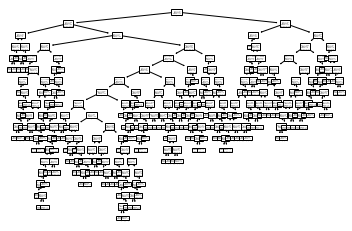

In [26]:
tree.plot_tree(model)

In [27]:
import graphviz
dot_data=tree.export_graphviz(model, out_file=None)
graph=graphviz.Source(dot_data)
graph.render('titanic')

'titanic.pdf'

In [28]:
input_data=(0,0,37,0,0,3.05,1)
input_data_as_numpy_array=np.asarray(input_data)

In [29]:
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

In [30]:
prediction = model.predict(input_data_reshaped)
#print(prediction)
if prediction[0]==0:
    print("Sorry, Not survived") 
if prediction[0]==1:
    print("Alive")

Sorry, Not survived
